In [1]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('training_set_milestone.csv')
df_test = pd.read_csv('test_set_milestone.csv')
classes = df_train['subreddit'].unique()

In [3]:
# Bag of words & Logistic Regression to determine word cutoff
f1_trainlist = []
f1_testlist = []

# Iterate through different value of M to calculate M that provides highest F1 Score for development set 
for M in range(10, 25):

    # Perform CountVectorizer on text
    count_vect = CountVectorizer(binary=False, min_df=M)
    X_train = count_vect.fit_transform(df_train['selftext'])
    X_dev = count_vect.transform(df_test['selftext'])

    # create logistic model with no regularization terms
    logreg = LogisticRegression(multi_class='ovr', penalty='none')
    logreg.fit(X_train, df_train['subreddit'].values)

    # calculate F1 score
    f1_train = f1_score(df_train['subreddit'].values, logreg.predict(X_train), average = 'micro')
    f1_test = f1_score(df_test['subreddit'].values, logreg.predict(X_dev), average = 'micro')

    # append F1 score to lists for plotting
    f1_trainlist.append(f1_train)
    f1_testlist.append(f1_test)

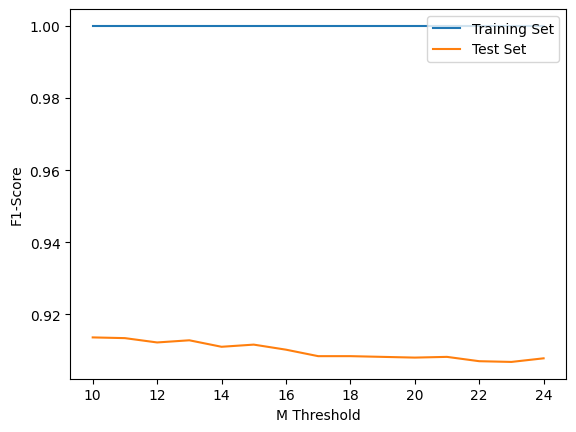

In [4]:
# plot F1-Score for Dev and Training sets to determine optimal M
plt.plot(range(10, 25), f1_trainlist, label="Training Set")
plt.plot(range(10, 25), f1_testlist, label="Test Set")
plt.xlabel("M Threshold")
plt.ylabel("F1-Score")
leg = plt.legend(loc='upper right')
plt.show()

In [5]:
# Choose M = 20 for performance on hardware and little degradation in performance
M = 20

# Perform CountVectorizer on text with new M threshold
count_vect = CountVectorizer(binary=False, min_df=M)
X_train = count_vect.fit_transform(df_train['selftext'])
X_test = count_vect.transform(df_test['selftext'])

# print number of feature vectors
print(len(count_vect.vocabulary_.keys()))

4974


In [6]:
# Logistic Regression with no Regularization Terms
logreg = LogisticRegression(multi_class='ovr', penalty='none')
logreg.fit(X_train, df_train['subreddit'].values)

# calculate F1 score
f1_train = f1_score(df_train['subreddit'].values, logreg.predict(X_train), average = 'micro')
f1_test = f1_score(df_test['subreddit'].values, logreg.predict(X_test), average = 'micro')

# print F1 values out
print(f"Training set with no regularization terms F1-Score is {f1_train}")
print(f"Test set with no regularization terms F1-Score is {f1_test}")

Training set with no regularization terms F1-Score is 1.0
Test set with no regularization terms F1-Score is 0.908


In [7]:
# LogisticRegression with L1 regularization
logregL1 = LogisticRegression(penalty='l1', solver='liblinear')
logregL1.fit(X_train, df_train['subreddit'].values)

# calculate F1 score
f1_train_L1 = f1_score(df_train['subreddit'].values, logregL1.predict(X_train), average = 'micro')
f1_test_L1 = f1_score(df_test['subreddit'].values, logregL1.predict(X_test), average = 'micro')

#print F1 values out
print(f"Training set with L1 regularization F1-Score is {f1_train_L1}")
print(f"Test set with L1 regularization F1-Score is {f1_test_L1}")

Training set with L1 regularization F1-Score is 0.99585
Test set with L1 regularization F1-Score is 0.9166


In [8]:
# LogisticRegression with L2 regularization
logregL2 = LogisticRegression(penalty='l2', solver='liblinear')
logregL2.fit(X_train, df_train['subreddit'].values)

# calculate F1 score
f1_train_L2 = f1_score(df_train['subreddit'].values, logregL2.predict(X_train), average = 'micro')
f1_test_L2 = f1_score(df_test['subreddit'].values, logregL2.predict(X_test), average = 'micro')

#print F1 values out
print(f"Training set with L1 regularization F1-Score is {f1_train_L2}")
print(f"Test set with L1 regularization F1-Score is {f1_test_L2}")

Training set with L1 regularization F1-Score is 0.9998
Test set with L1 regularization F1-Score is 0.9226


In [9]:
# Inspect weight vector of classifier with L2 regularization for each class
for k in range(df_train['subreddit'].nunique()):
    # print the classes
    print(logregL2.classes_[k])
    # retrieve index from coefficients that are greater than a value v
    impt_index = [i for i,v in enumerate(logregL2.coef_.tolist()[k]) if v > 2]

    # map the index to the actual word
    impt_words = [count_vect.get_feature_names_out()[i] for i in impt_index]

    # print the words 
    print(impt_words)

AskLiteraryStudies
['literary', 'literature']
BATProject
['bat', 'brave']
DBZDokkanBattle
['dokkan', 'global', 'stone']
Garmin
['fenix', 'forerunner', 'garmin', 'hr', 'vivoactive']
Harley
['bike', 'harley', 'ride', 'sportster']
KissAnime
['anime', 'kissanime']
NameThatSong
['lyric', 'song']
Nootropics
['nootropic', 'nootropics', 'stack']
absolver
['absolver', 'combat', 'pvp']
antidepressants
['antidepressant', 'wellbutrin']
asmr
['asmr']
dpdr
['dp', 'dpdr']
hockeyplayers
['hockey', 'ice', 'skate', 'stick']
homeless
['homeless', 'shelter']
intel
['cpu', 'intel']
l5r
['clan', 'ffg', 'lcg', 'rpg']
oculusnsfw
['oculus', 'porn', 'vr']
poetry_critics
[]
rawdenim
['denim', 'jean']
residentevil
['capcom', 'dlc', 'leon', 're', 'resident']
ringdoorbell
['doorbell', 'motion', 'ring']
sissyhypno
['cock', 'cum', 'gurls', 'hypno', 'hypnos', 'hypnosis', 'sissy']
steinsgate
['kurisu', 'okabe', 'sg', 'steinsgate', 'vn']
talesfromtechsupport
[]
teenmom
['farrah', 'jenelle', 'teen']


In [10]:
# Multinomial Naive Bayes

# create array of target values
y_train = df_train['subreddit'].values

# convert X_train to array for manipulation
X_train = X_train.toarray()

# train Multinomrial NB with alpha=1
multiNB = MultinomialNB(alpha=1)
multiNB.fit(X_train, y_train)

# calculate the accuracy for training set using Naive Bayes Classifier
f1_train_nb = f1_score(y_train, multiNB.predict(X_train), average = 'micro')

print(f"Training set with Naive Bayes F1-Score is {f1_train_nb}")

Training set with Naive Bayes F1-Score is 0.95195


In [11]:
# Calculate the predictions for test set using Naive Bayes Classifier

# create array of target values
y_test = df_test['subreddit'].values

# convert Xtrain to array for manipulation
X_test = X_test.toarray()

# Calculate the accuracy:
f1_test_nb = f1_score(y_test, multiNB.predict(X_test), average = 'micro')

print(f"Test set with Naive Bayes F1-Score is {f1_test_nb}")

Test set with Naive Bayes F1-Score is 0.9228


In [12]:
# N-gram model, determine cutoff for M
f1_trainlist = []
f1_testlist = []

# Iterate through different value of M to calculate M that provides highest F1 Score for development set 
for M in range(30, 40):

    # Perform CountVectorizer on text
    count_vect = CountVectorizer(binary=False, ngram_range=(1,2), min_df=M)
    X_train = count_vect.fit_transform(df_train['selftext'])
    X_dev = count_vect.transform(df_test['selftext'])

    # create logistic model with no regularization terms
    logreg = LogisticRegression(multi_class='ovr', penalty='none')
    logreg.fit(X_train, df_train['subreddit'].values)

    # calculate F1 score
    f1_train = f1_score(df_train['subreddit'].values, logreg.predict(X_train), average = 'micro')
    f1_test = f1_score(df_test['subreddit'].values, logreg.predict(X_dev), average = 'micro')

    # append F1 score to lists for plotting
    f1_trainlist.append(f1_train)
    f1_testlist.append(f1_test)

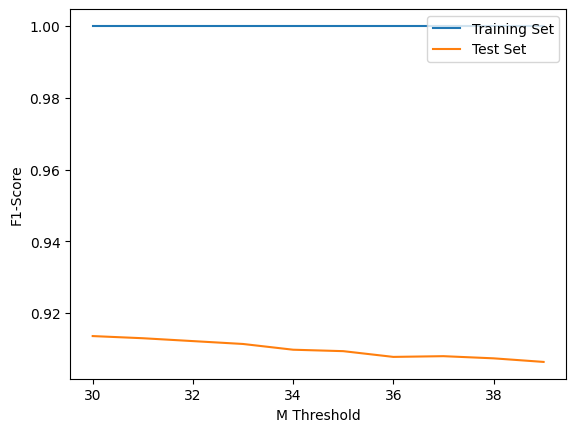

In [13]:
# plot F1-Score for Dev and Training sets to determine optimal M
plt.plot(range(30, 40), f1_trainlist, label="Training Set")
plt.plot(range(30, 40), f1_testlist, label="Test Set")
plt.xlabel("M Threshold")
plt.ylabel("F1-Score")
leg = plt.legend(loc='upper right')
plt.show()

In [14]:
# Choose M as 40 (minimal degradation in performance) 
M = 40

# Perform CountVectorizer on text with new M threshold
count_vect = CountVectorizer(binary=False, ngram_range=(1,2), min_df=M)
X_train = count_vect.fit_transform(df_train['selftext'])
X_test = count_vect.transform(df_test['selftext'])

# print number of feature vectors
print(len(count_vect.vocabulary_.keys()))

6070


In [15]:
# Logistic Regression with no Regularization Terms
logreg = LogisticRegression(multi_class='ovr', penalty='none')
logreg.fit(X_train, df_train['subreddit'].values)

# calculate F1 score
f1_train = f1_score(df_train['subreddit'].values, logreg.predict(X_train), average = 'micro')
f1_test = f1_score(df_test['subreddit'].values, logreg.predict(X_test), average = 'micro')

# print F1 values out
print(f"Training set with no regularization terms F1-Score is {f1_train}")
print(f"Test set with no regularization terms F1-Score is {f1_test}")

Training set with no regularization terms F1-Score is 1.0
Test set with no regularization terms F1-Score is 0.9078


In [16]:
# LogisticRegression with L1 regularization
logregL1 = LogisticRegression(penalty='l1', solver='liblinear')
logregL1.fit(X_train, df_train['subreddit'].values)

# calculate F1 score
f1_train_L1 = f1_score(df_train['subreddit'].values, logregL1.predict(X_train), average = 'micro')
f1_test_L1 = f1_score(df_test['subreddit'].values, logregL1.predict(X_test), average = 'micro')

#print F1 values out
print(f"Training set with L1 regularization F1-Score is {f1_train_L1}")
print(f"Test set with L1 regularization F1-Score is {f1_test_L1}")

Training set with L1 regularization F1-Score is 0.99665
Test set with L1 regularization F1-Score is 0.9103999999999999


In [17]:
# LogisticRegression with L2 regularization
logregL2 = LogisticRegression(penalty='l2', solver='liblinear')
logregL2.fit(X_train, df_train['subreddit'].values)

# calculate F1 score
f1_train_L2 = f1_score(df_train['subreddit'].values, logregL2.predict(X_train), average = 'micro')
f1_test_L2 = f1_score(df_test['subreddit'].values, logregL2.predict(X_test), average = 'micro')

#print F1 values out
print(f"Training set with L1 regularization F1-Score is {f1_train_L2}")
print(f"Test set with L1 regularization F1-Score is {f1_test_L2}")

Training set with L1 regularization F1-Score is 0.99995
Test set with L1 regularization F1-Score is 0.915


In [18]:
# Multinomial Naive Bayes

# create array of target values
y_train = df_train['subreddit'].values

# convert X_train to array for manipulation
X_train = X_train.toarray()

# train Multinomrial NB with alpha=1
multiNB = MultinomialNB(alpha=1)
multiNB.fit(X_train, y_train)

# calculate the accuracy for training set using Naive Bayes Classifier
f1_train_nb = f1_score(y_train, multiNB.predict(X_train), average = 'micro')

print(f"Training set with Naive Bayes F1-Score is {f1_train_nb}")

Training set with Naive Bayes F1-Score is 0.9458


In [19]:
# Calculate the predictions for test set using Naive Bayes Classifier

# create array of target values
y_test = df_test['subreddit'].values

# convert Xtrain to array for manipulation
X_test = X_test.toarray()

# Calculate the accuracy:
f1_test_nb = f1_score(y_test, multiNB.predict(X_test), average = 'micro')

print(f"Test set with Naive Bayes F1-Score is {f1_test_nb}")

Test set with Naive Bayes F1-Score is 0.9122000000000001
